# 1) Data Import and Cleaning 

1) First, we import the libraries and load the data file to Jupyter. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
#Load statsmodels library
import statsmodels.api as sm

In [3]:
data_lending=pd.read_csv("lc_2016_2017.csv")
data_lending.head()
data_lending1=data_lending[['loan_amnt','int_rate','grade','home_ownership','dti','verification_status','emp_length','term','loan_status']]

C:\Users\Aniket\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (18,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2) Next, we make a dataframe which we require, that is eliminate all the redundant columns and take only those which we require for our analysis. For the employment length column, we use the nested np.where function to convert the data to numeric type by removing the 'years'and 'spaces'. For converting, the 'term'column to numeric, we use the strip function to eliminate months.  

In [4]:
data_lending1['emp_length1'] = np.where(data_lending1['emp_length']=='10+ years', '10',
                                        (np.where(data_lending1['emp_length']=='7 years', '7',
                                                  (np.where(data_lending1['emp_length']=='6 years','6',
                                                            (np.where(data_lending1['emp_length']=='5 years','5',
                                                                      (np.where(data_lending1['emp_length']=='4 years','4',
                                                                                (np.where(data_lending1['emp_length']=='3 years','3',
                                                                                          (np.where(data_lending1['emp_length']=='2 years','2',
                                                                                                    (np.where(data_lending1['emp_length']=='1 year','1',
                                                                                                              (np.where(data_lending1['emp_length']=='<1 year','0','0')))))))))))))))))

C:\Users\Aniket\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [5]:
data_lending1['term'] = data_lending1['term'].map(lambda x: x.rstrip(' months'))
data_lending1['verification_status1']=np.where(data_lending1['verification_status']=='Source Verified','Verified',
                       (np.where(data_lending1['verification_status']=='Verified','Verified','Not Verified')))

C:\Users\Aniket\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Aniket\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


3) Next we define dummy variables for the 'verification status' as well as the 'grade' column - which indicates the riskiness score of the borrower. It is comparable to a FICO score for determining the credit standing of a retail borrower. 

In [7]:
gradedummies=pd.get_dummies(data_lending1['grade'])
data_lending2=data_lending1.join(gradedummies)
verifdummies=pd.get_dummies(data_lending1['verification_status1'])
data_lending2=data_lending2.join(verifdummies)
data_lending2['loan_status1']=np.where(data_lending2['loan_status']=='Late (31-120 days)','Default',data_lending2['loan_status'])

4) We define our dependent variable 'loan_status2 as a boolean variable to be used in the logistic regression. It takes values of '1' when the obligor is in default and '0' when there is no default on the part of the obligor. 

In [8]:
data_lending2['loan_status2']=np.where(data_lending2['loan_status1']=='Default','1','0')
del data_lending2['verification_status1']
del data_lending2['grade']
del data_lending2['loan_status']
del data_lending2['loan_status1']
del data_lending2['emp_length']
del data_lending2['home_ownership']
del data_lending2['verification_status']
data_lending2.head()

,loan_amnt,int_rate,dti,term,emp_length1,A,B,C,D,E,F,G,Not Verified,Verified,loan_status2
0,2300,12.62,21.61,36,0,0,0,1,0,0,0,0,1,0,0
1,16000,12.62,25.61,60,10,0,0,1,0,0,0,0,1,0,0
2,6025,15.05,8.88,36,7,0,0,1,0,0,0,0,1,0,0
3,20400,9.44,27.06,36,10,0,1,0,0,0,0,0,0,1,0
4,13000,11.99,6.79,36,10,0,1,0,0,0,0,0,0,1,0


5) We then identify the non-numeric data in the dataframe and convert it into a numeric dataset. 

In [9]:
data_lending2.dtypes
data_lending3=data_lending2.convert_objects(convert_dates=False, convert_numeric=True, convert_timedeltas=False, copy=True)
data_lending3.dtypes
data_lending3.head()

C:\Users\Aniket\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,loan_amnt,int_rate,dti,term,emp_length1,A,B,C,D,E,F,G,Not Verified,Verified,loan_status2
0,2300,12.62,21.61,36,0,0,0,1,0,0,0,0,1,0,0
1,16000,12.62,25.61,60,10,0,0,1,0,0,0,0,1,0,0
2,6025,15.05,8.88,36,7,0,0,1,0,0,0,0,1,0,0
3,20400,9.44,27.06,36,10,0,1,0,0,0,0,0,0,1,0
4,13000,11.99,6.79,36,10,0,1,0,0,0,0,0,0,1,0


6) It is imperative that the NA and NaN values are completely eliminated from the dataset. For this, we use the function isnull().values.any(). We identify that dti has NA values and then using the isfinite function, we eliminate the NA values from the 'dti' series. Finally, we use the isnull().any() function to confirm that no column has any NA values. 

In [11]:
data_lending3.isnull().values.any()
data_lending3.isnull().any()
data_lending3 = data_lending3[np.isfinite(data_lending3['dti'])]
data_lending3.isnull().any()

loan_amnt       False
int_rate        False
dti             False
term            False
emp_length1     False
A               False
B               False
C               False
D               False
E               False
F               False
G               False
Not Verified    False
Verified        False
loan_status2    False
dtype: bool

# 2) Logistic Regression

7) Using appropriate independent or explanatory variables, we use the logit model to conduct a logistic regression of loan status. Loan status value of '1' indicates default and '0' indicates no default.

In [12]:
logit_model=sm.Logit(data_lending3.loan_status2,data_lending3[["dti","int_rate","term","emp_length1","A","B","C","D","E","F","G"]])
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.095434
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           loan_status2   No. Observations:               758983
Model:                          Logit   Df Residuals:                   758972
Method:                           MLE   Df Model:                           10
Date:                Wed, 18 Jul 2018   Pseudo R-squ.:                 0.03685
Time:                        12:10:08   Log-Likelihood:                -72433.
converged:                       True   LL-Null:                       -75204.
                                        LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
dti             0.0014      0.000      3.498      0.000       0.001       0.002
int_rate        0.0637    

8) Results indicate that the explanatory variables identified were significant as indicated by the ~ 0 p-value for each of the independent variables. The Pseudo R-Sq of the regression is 3.69% as the logistic regression does not produce a high R-sq value due to the binary nature of the dependent variable causing an imperfect fit. The coefficients of the regression values indicate whther the relation between the explanatory variable and the response vaiable is positive or negative and the magnitude of the relationship to some extent. The Debt/Income (dti) and Interest Rate(int_rate) show a positive relation whereas all other parameters show a negative relationshop with the log odds of default or the explanatory variable.  

9) Also from conducting the regression for different variables, we found that the dummy variable 'verification_status' does not affect the model significance neither does it provide any huge added explanation for the variation in the dependent variable. Thus we can do not consider the verifdummy variable in our analysis.  

10) We then use seaborn to plot graphs of y vs a select few variables to visualize relationships exisiting between them. As y can take only 2 values, it shows on a straight line for y=1 and y=0 in each case. 

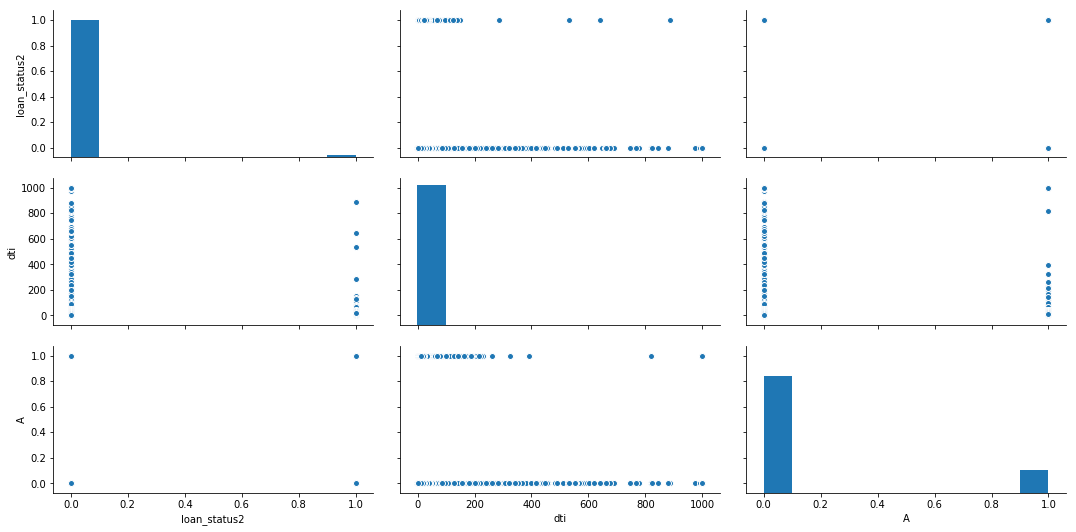

In [96]:
sns.pairplot(data_lending3[["loan_status2","dti","A"]], aspect=2)

# 3) Calculating Probability of Default for the dataset

10) From the regression, we computed the coefficients for each variable which can then be tested on the dataset, to find the probability of default in each case. For this, we begin by adding 3 columns in our dataframe for the logodds, odds and finally default probability. 

In [14]:
data_lending3['logodds']=0.0014*data_lending3['dti']+0.0637*data_lending3['int_rate']-0.0107*data_lending3['term']-0.0081*data_lending3['emp_length1']-5.2577*data_lending3['A']-4.5383*data_lending3['B']-4.2131*data_lending3['C']-4.0533*data_lending3['D']-4.044*data_lending3['E']-3.9968*data_lending3['F']-4.0352*data_lending3['G']
data_lending3['odds']=np.exp(data_lending3['logodds'])
data_lending3['prob']= data_lending3['odds']/(1+data_lending3['odds'])

In [15]:
data_lending3.head()

,loan_amnt,int_rate,dti,term,emp_length1,A,B,C,D,E,F,G,Not Verified,Verified,loan_status2,logodds,odds,prob
0,2300,12.62,21.61,36,0,0,0,1,0,0,0,0,1,0,0,-3.764152,0.023187,0.022662
1,16000,12.62,25.61,60,10,0,0,1,0,0,0,0,1,0,0,-4.096352,0.016633,0.016361
2,6025,15.05,8.88,36,7,0,0,1,0,0,0,0,1,0,0,-3.683883,0.025125,0.024509
3,20400,9.44,27.06,36,10,0,1,0,0,0,0,0,0,1,0,-4.365288,0.012711,0.012551
4,13000,11.99,6.79,36,10,0,1,0,0,0,0,0,0,1,0,-4.231231,0.014534,0.014326


# 4) Calculating Expected loss for the portfolio

11) We require to calculate the expected losses from the portfolio so that the bank can look to optimally allocate its resources going into the future. For this we use the euqtion: Expected loss = Prob of default x Loss given default x Exposure at default.

In [16]:
data_lending3['LGD']=1-data_lending['recoveries']/data_lending['loan_amnt']
data_lending3['exp_loss']=data_lending3['prob']*data_lending3['LGD']*data_lending3['loan_amnt']
data_lending3.head()

,loan_amnt,int_rate,dti,term,emp_length1,A,B,C,D,E,F,G,Not Verified,Verified,loan_status2,logodds,odds,prob,LGD,exp_loss
0,2300,12.62,21.61,36,0,0,0,1,0,0,0,0,1,0,0,-3.764152,0.023187,0.022662,1.0,52.122143
1,16000,12.62,25.61,60,10,0,0,1,0,0,0,0,1,0,0,-4.096352,0.016633,0.016361,1.0,261.777675
2,6025,15.05,8.88,36,7,0,0,1,0,0,0,0,1,0,0,-3.683883,0.025125,0.024509,1.0,147.669251
3,20400,9.44,27.06,36,10,0,1,0,0,0,0,0,0,1,0,-4.365288,0.012711,0.012551,1.0,256.049630
4,13000,11.99,6.79,36,10,0,1,0,0,0,0,0,0,1,0,-4.231231,0.014534,0.014326,1.0,186.241415


# 5) Visualizing losses by loan type

12) Here, we first group the loans into categories i.e. credit card, housing, car, wedding, vacation, small business and others, then calculate expected losses for each category (using seaborn visualization) and plot the same in the form of a histogram.The plot gives the mean of the expected values for each category and is a good indication of how the portfolio is performing and whether there is any reallocation that could possibly be done to minimize losses going into the future i.e. lower allocation of assets (loans) to small business which have higher mean expected losses and higher allocation to vacation and car loans which show low expected losses.

In [1]:
data_lending3['prob'].describe()

NameError: name 'data_lending3' is not defined

In [2]:
data_lending1['loan_type']=np.where(data_lending['purpose']=='debt_consolidation','credit_card',
                                    np.where(data_lending['purpose']=='home_improvement','house',
                                             np.where(data_lending['purpose']=='major_purchase','other',
                                                      np.where(data_lending['purpose']=='moving','other',
                                                               np.where(data_lending['purpose']=='medical','other',
                                                                         np.where(data_lending['purpose']=='renewable_energy','other',data_lending['purpose']))))))

NameError: name 'np' is not defined

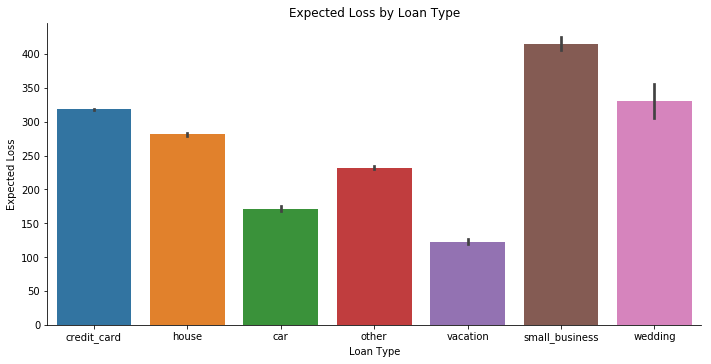

In [90]:
data_lending3['loan_type']=data_lending1['loan_type']
data_lending3.groupby('loan_type')
g1 = sns.factorplot(kind="bar", x="loan_type", y="exp_loss", data=data_lending3, size=5, aspect=2)
g1.set(title = "Expected Loss by Loan Type")
plt.ylabel('Expected Loss')
plt.xlabel('Loan Type')
plt.show()

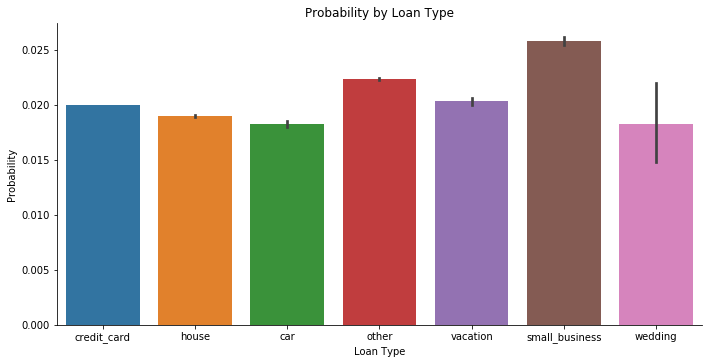

In [91]:
data_lending3['loan_type']=data_lending1['loan_type']
data_lending3.groupby('loan_type')
g2 = sns.factorplot(kind="bar", x="loan_type", y="prob", data=data_lending3, size=5, aspect=2)
g2.set(title = "Probability by Loan Type")
plt.ylabel('Probability')
plt.xlabel('Loan Type')
plt.show()

In [25]:
loanbytype['exp_loss'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_type,,,,,,,,
car,8775.0,171.558819,199.262830,-3.877649,52.054594,106.731939,214.788135,2968.597720
credit_card,589005.0,318.644060,304.972647,-116.898841,113.440264,222.501636,420.076538,7469.085314
house,60737.0,281.495982,306.867529,-488.532349,79.795844,176.284071,368.691418,3308.892142
other,85815.0,232.138603,282.820906,-50.257785,63.612566,132.717232,281.881611,3134.509269
small_business,8232.0,415.464185,401.135376,5.395687,136.104897,285.125829,560.227637,3363.863268
vacation,6416.0,122.629309,157.493686,0.273350,37.328492,73.738156,140.373248,2203.972689
wedding,3.0,330.328766,25.464411,305.124861,317.470187,329.815513,342.930718,356.045923


In [26]:
loanbytype['prob'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_type,,,,,,,,
car,8775.0,0.018267,0.012093,0.003808,0.010269,0.014743,0.023836,0.083023
credit_card,589005.0,0.019992,0.012174,0.003546,0.012474,0.017500,0.025039,0.213402
house,60737.0,0.019005,0.012666,0.003551,0.010754,0.015257,0.024372,0.211803
other,85815.0,0.022374,0.013723,0.003743,0.013344,0.021246,0.027342,0.206043
small_business,8232.0,0.025804,0.015193,0.004048,0.014207,0.023202,0.034664,0.088262
vacation,6416.0,0.020309,0.012095,0.004055,0.013069,0.020063,0.024991,0.090891
wedding,3.0,0.018257,0.003586,0.014835,0.016392,0.017949,0.019968,0.021988
